<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/NB05_Survivorship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


- **Survivorship bias**: Focusing only on data that "survived" a process while ignoring data that did not. This can lead to misinterpretations of cause and effect. For example, studying only successful entrepreneurs who dropped out of college without considering those who failed or those who succeeded with a college degree can lead to faulty conclusions about the necessity of a college degree.


*The data used herein is for illustrative purposes only and does not reflect actual real-world data*

### Do you know this image? What is the issue/bias here?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Survivorship-bias.svg/1920px-Survivorship-bias.svg.png)

#### Explanation


During WWII, statisticians were tasked with determining which parts of military aircraft should be armored to better withstand enemy fire and reduce crashes. The initial approach was to reinforce areas that showed the most damage on returning planes.

However, a mathematician named Abraham Wald disagreed with this strategy. He argued that the returning planes represented the "survivors," and therefore, the damage they sustained was not critical enough to bring them down. Instead, Wald proposed that the areas undamaged on the returning planes were actually the most crucial, as damage to those parts likely resulted in the aircraft not making it back.

Wald's insight identified a logical error known as Survival Bias. This bias causes us to focus only on successful outcomes or "survivors" while overlooking failures or "non-survivors." The text explains that this bias is still prevalent today; for example, when analyzing business success, we often study companies that thrived while ignoring the many similar ventures that failed. Wald's idea highlighted the importance of considering the unseen failures (the planes that didn't return) to truly understand what was necessary for survival.

#### Can you read the results of a trained Decision [Tree](https://colab.research.google.com/github/lcbjrrr/quantai/blob/main/M4A_Py_ML_Arv.ipynb)? For the Titanic survival profile, would you survive?

![](https://pbs.twimg.com/media/G7IC23lWMAAppEG?format=png&name=small)

#### What is wrong? Let's review the model training

In [13]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Titanic%20-%20train.csv')
train.head(3)

,Female,Pclass,Age,FamilySize,Survived
0,False,3,30,0,False
1,False,1,21,2,True
2,False,2,27,2,False


In [14]:
female_df = train[train['Female']==True]
female_df.head()

,Female,Pclass,Age,FamilySize,Survived
3,True,1,31,0,True
11,True,2,34,1,True
16,True,1,36,1,True
19,True,2,28,0,True
22,True,1,37,2,True


In [15]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(female_df[['Female',	'Pclass',	'Age','FamilySize']],female_df['Survived'])
tree.score(female_df[['Female',	'Pclass',	'Age', 'FamilySize']],female_df['Survived'])


1.0

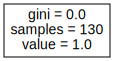

In [16]:
from sklearn.tree import export_graphviz
from graphviz import Source
Source(export_graphviz(tree,filled=True,
                           feature_names= ['Female',	'Pclass',	'Age', 'FamilySize'],
                           class_names=['NOT','Surv']))

*This decision tree, trained on only female passengers, realizing that all of the ladies survided*

In [17]:
from sklearn import metrics
test = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Titanic%20-%20test.csv')
preds=tree.predict(test[['Female',	'Pclass',	'Age', 'FamilySize']])
test['prediction']=preds
test


,Female,Pclass,Age,FamilySize,Survived,prediction
0,True,2,31,0,True,True
1,True,1,27,1,True,True
2,True,2,34,0,True,True
3,False,3,25,0,False,True
4,True,2,31,0,True,True
5,True,1,27,1,True,True
6,True,2,34,0,True,True
7,True,2,31,0,True,True
8,True,1,27,1,True,True
9,True,2,34,0,True,True


In [18]:
metrics.accuracy_score(test['Survived'],preds)


0.9

*The initial predictions were flawed due to survivorship bias. The model was trained only on data of female passengers, which resulted in a biased model that predicted a very high survival rate (100% in one test) because the training data itself was skewed towards survivors. This led to inaccurate predictions when applied to a more diverse test set, as it didn't account for the non-survivors (e.g., male passengers) that were excluded from the training data*

### Let's re-train with the complete dataset

1.0


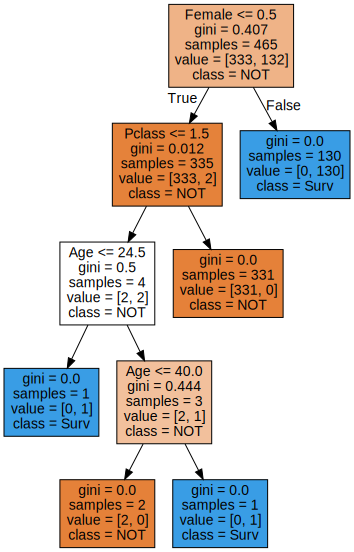

In [19]:
import pandas as pd
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(train[['Female',	'Pclass',	'Age','FamilySize']],train['Survived'])
acc=tree.score(train[['Female',	'Pclass',	'Age', 'FamilySize']],train['Survived'])
print(acc)
Source(export_graphviz(tree,filled=True,
                           feature_names= ['Female',	'Pclass',	'Age', 'FamilySize'],
                           class_names=['NOT','Surv']))

*The decision tree for Titanic survival primarily indicates a strong influence of gender and passenger class (Pclass). For male passengers, young children in 1st or 2nd class had a high survival rate, while adult males in 1st or 2nd class mostly did not survive, and adult and elderly males in 3rd class had very low survival rates. Conversely, female passengers in 1st or 2nd class almost universally survived. For females in 3rd class, younger individuals had a higher chance of survival than older ones, though a significant portion still did not survive. Overall, being female and in a higher passenger class significantly increased the likelihood of survival*

In [20]:
test = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Titanic%20-%20test.csv')
preds=tree.predict(test[['Female',	'Pclass',	'Age', 'FamilySize']])
#print(preds)
test['prediction'] = preds
test

,Female,Pclass,Age,FamilySize,Survived,prediction
0,True,2,31,0,True,True
1,True,1,27,1,True,True
2,True,2,34,0,True,True
3,False,3,25,0,False,False
4,True,2,31,0,True,True
5,True,1,27,1,True,True
6,True,2,34,0,True,True
7,True,2,31,0,True,True
8,True,1,27,1,True,True
9,True,2,34,0,True,True


In [21]:
metrics.accuracy_score(test['Survived'],preds)

1.0

*The testing accuracy is 1.0, which means the model achieved 100% accuracy on the test dataset. This indicates that the model predicted the survival outcome perfectly for all the individuals in the test set*.

## Activity: Survivorship bias


**Problem**

Survivorship bias can severely distort the insights gained from machine learning models by only considering data points that "survived" a particular process, neglecting critical information from those that did not. Your task is to select a dataset suitable for a classification problem (e.g., predicting customer churn, loan default, or student success) from Kaggle. .Train a classifier, such as a decision tree, on this dataset to make predictions. Analyze your model's performance and the characteristics of the data it was trained on. Specifically, reflect on: 1) are there missing data points or entire categories that were excluded because they didn't "survive" a particular outcome? 2) how might the absence of this "non-survivor" data lead to a biased or misleading understanding of the underlying patterns and predictions?

**Conclusion**

Summarize the specific instances of survivorship bias identified in your dataset and how they impacted your classifier's predictions and performance. Discuss the methods you employed to detect this bias and the feasibility or success of any proposed mitigation strategies. Reflect on the broader implications of survivorship bias in real-world applications of machine learning, emphasizing the importance of comprehensive data collection and critical data analysis to build more robust and equitable models.



```
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Titanic%20-%20bi.csv')
df

```

